C:\Users\nyuge\AppData\Local\Temp\ipykernel_28552\3212221253.py:29: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df['Best_Combo'] = df[list(exam_combinations.keys())].idxmax(axis=1)


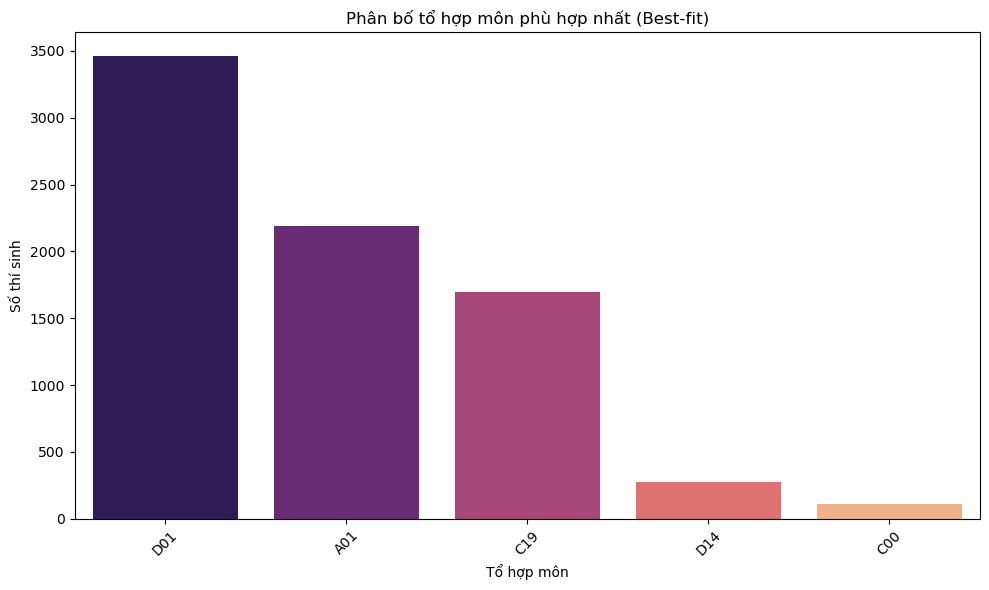

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load file CSV
df = pd.read_csv("D:\KHDLUD\Final\ADS_Final\Data\diemthi_21-24.csv")

# Các môn cần xử lý điểm số
subjects = ['Toán', 'Văn', 'Sử', 'Địa', 'Lí', 'Hoá', 'Sinh', 'Ngoại ngữ', 'GDCD']
df[subjects] = df[subjects].apply(pd.to_numeric, errors='coerce')

# Các tổ hợp môn phổ biến
exam_combinations = {
    'A00': ['Toán', 'Lí', 'Hoá'],
    'A01': ['Toán', 'Lí', 'Ngoại ngữ'],
    'B00': ['Toán', 'Hoá', 'Sinh'],
    'C00': ['Văn', 'Sử', 'Địa'],
    'C19': ['Văn', 'Sử', 'GDCD'],
    'D01': ['Toán', 'Văn', 'Ngoại ngữ'],
    'D14': ['Văn', 'Sử', 'Ngoại ngữ'],
}

# Tính tổng điểm cho từng tổ hợp
for combo, subjects_in_combo in exam_combinations.items():
    df[combo] = df[subjects_in_combo].sum(axis=1, skipna=False)  # bỏ qua nếu thiếu bất kỳ môn nào

# Chọn tổ hợp có điểm cao nhất
df['Best_Combo'] = df[list(exam_combinations.keys())].idxmax(axis=1)
df['Best_Combo_Score'] = df[list(exam_combinations.keys())].max(axis=1)

# Vẽ biểu đồ phân bố tổ hợp môn phù hợp nhất
combo_counts = df['Best_Combo'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=combo_counts.index, y=combo_counts.values, palette='magma')
plt.title("Phân bố tổ hợp môn phù hợp nhất (Best-fit)")
plt.xlabel("Tổ hợp môn")
plt.ylabel("Số thí sinh")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Xuất file kết quả (nếu cần)
df[['SBD', 'Năm thi', 'Best_Combo', 'Best_Combo_Score']].to_csv("ket_qua_to_hop.csv", index=False)


In [12]:
# Tính điểm trung bình TN (Lý, Hóa, Sinh)
df["KHTN"] = df[["Lí", "Hoá", "Sinh"]].mean(axis=1, skipna=False).round(1)

# Tính điểm trung bình XH (Sử, Địa, GDCD)
df["KHXH"] = df[["Sử", "Địa", "GDCD"]].mean(axis=1, skipna=False).round(1)

In [14]:
print(df)

          SBD                           Sở GD  Toán   Văn    Sử   Địa    Lí  \
0     2000001  Sở GD&ĐT Thành Phố Hồ Chí Minh   8.0  7.00   NaN   NaN  7.25   
1     2000002  Sở GD&ĐT Thành Phố Hồ Chí Minh   6.0  7.25  6.75  5.75   NaN   
2     2000003  Sở GD&ĐT Thành Phố Hồ Chí Minh   9.2  7.75   NaN   NaN  8.50   
3     2000004  Sở GD&ĐT Thành Phố Hồ Chí Minh   8.2  7.50  7.25  7.25   NaN   
4     2000005  Sở GD&ĐT Thành Phố Hồ Chí Minh   7.8  6.50  4.50  5.00   NaN   
...       ...                             ...   ...   ...   ...   ...   ...   
7995  2002059  Sở GD&ĐT Thành Phố Hồ Chí Minh   6.0  4.00   NaN   NaN  6.25   
7996  2002060  Sở GD&ĐT Thành Phố Hồ Chí Minh   6.2  6.50  4.00  6.50   NaN   
7997  2002061  Sở GD&ĐT Thành Phố Hồ Chí Minh   6.8  8.00  3.75  6.75   NaN   
7998  2002062  Sở GD&ĐT Thành Phố Hồ Chí Minh   8.0  7.00   NaN   NaN  6.00   
7999  2002063  Sở GD&ĐT Thành Phố Hồ Chí Minh   7.4  8.25  4.75  8.25   NaN   

      Hoá  Sinh  Ngoại ngữ   GDCD  Năm thi  KHTN  K

In [15]:
df.to_csv("du_lieu_co_TN_XH.csv", index=False)

In [17]:
df = pd.read_csv("D:\KHDLUD\Final\ADS_Final\Data\ma_to_hop_2024")

In [18]:
df

,Mã tổ hợp,Môn 1,Môn 2,Môn 3
0,A00,Toán,Vật lý,Hóa học
1,A01,Toán,Vật lý,Ngoại ngữ
2,A02,Toán,Vật lí,Sinh học
3,A03,Toán,Vật lý,Lịch sử
4,A04,Toán,Vật lý,Địa lí
...,...,...,...,...
122,D98,Toán,Khoa học xã hội,Ngoại ngữ
123,D99,Toán,Khoa học xã hội,Ngoại ngữ
124,DD0,Toán,Khoa học xã hội,Ngoại ngữ
125,DD2,Ngữ văn,Toán,Ngoại ngữ


In [19]:
df.replace("Khoa học tự nhiên", "KHTN", inplace=True)


In [20]:
df.replace("Khoa học xã hội", "KHXH", inplace=True)


In [21]:
df

,Mã tổ hợp,Môn 1,Môn 2,Môn 3
0,A00,Toán,Vật lý,Hóa học
1,A01,Toán,Vật lý,Ngoại ngữ
2,A02,Toán,Vật lí,Sinh học
3,A03,Toán,Vật lý,Lịch sử
4,A04,Toán,Vật lý,Địa lí
...,...,...,...,...
122,D98,Toán,KHXH,Ngoại ngữ
123,D99,Toán,KHXH,Ngoại ngữ
124,DD0,Toán,KHXH,Ngoại ngữ
125,DD2,Ngữ văn,Toán,Ngoại ngữ


In [23]:
df.to_csv("ma_to_hop_2024", index=False)